# Assignment\#2: Model Selection and Hyper-parameters Tunning
In this assignment, firstly,polynomial regression and ridge regrission were used for model selection for an optimal model and the part was focused to find the optimal polyinomial degree and the ridge regression to regulate the parameter (degree 8) and logistic regression was used for binary classification problem. Two models were learned, a linear one and a one of the second order. The models were implemented once by implementing using scikit-learn library.

**Part** **1**

**A.**

firstly, the  important libararies has been imported for all tasks below, to use the functionlites to be used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from matplotlib.lines import Line2D
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Secondly, the data has been loading from "data_reg.csv" using pandas libaray, and was splitted into training(first 120 examples), validation(next 40 examples), and testing( last 40 examples) datasets.

Also, a 3D scatter plot was created to visualize the datasets, and here diffrent colors used for datasets, with labeled axes accordingly (x1,x2,y)

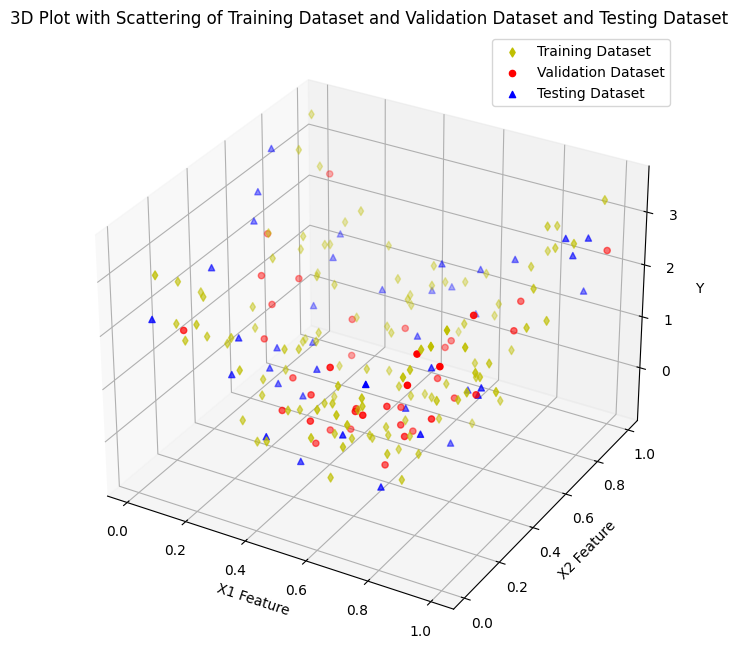

In [3]:
CSVdata = pd.read_csv('data_reg.csv')
figure = plt.figure(figsize=(10, 8))
axis = figure.add_subplot(111, projection='3d')
train_data = CSVdata[:120]
axis.scatter(train_data['x1'], train_data['x2'], train_data['y'], c='y', marker='d', label='Training Dataset')
val_data = CSVdata[120:160]
axis.scatter(val_data['x1'], val_data['x2'], val_data['y'], c='r', marker='o', label='Validation Dataset')
test_data = CSVdata[160:]
axis.scatter(test_data['x1'], test_data['x2'], test_data['y'], c='b', marker='^', label='Testing Dataset')

axis.set_xlabel('X1 Feature')
axis.set_ylabel('X2 Feature')
axis.set_zlabel('Y')
axis.set_title('3D Plot with Scattering of Training Dataset and Validation Dataset and Testing Dataset')
axis.legend()
plt.show()


**B.**

Here, the code below presents an implementation of polynomial regression with diffrent degrees, so the input features are expnaded to include polynomial terms up to a certain degree, it uses the 'PolynomialFeatures' class from scikit-learn, and the model prensents a linear regression

Also, the code iterates over a range of polynomial degree and trains a model for each degree , and it calculate and store the mean squared error for both the training and validation datasets

For each degree, a 3D plot was created to visualize the leraned function along with the training and testing datasets, however the code creates a plot showing the mean squared error changes on each polynomial degree for the datasets mentioned above.

Finally as shown in the results after executing the code below, the result presents an identifing the best polynomial degree based on the minimum mean squared error value on the validation dataset.


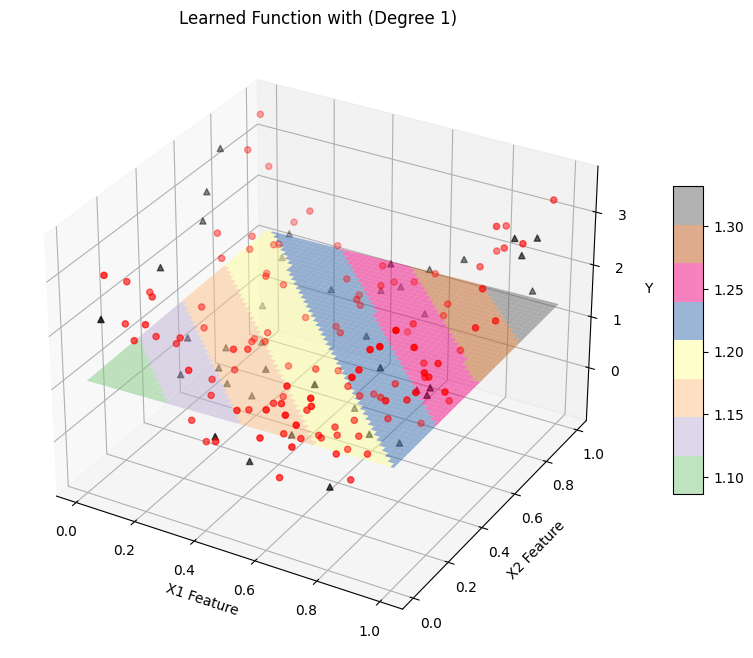

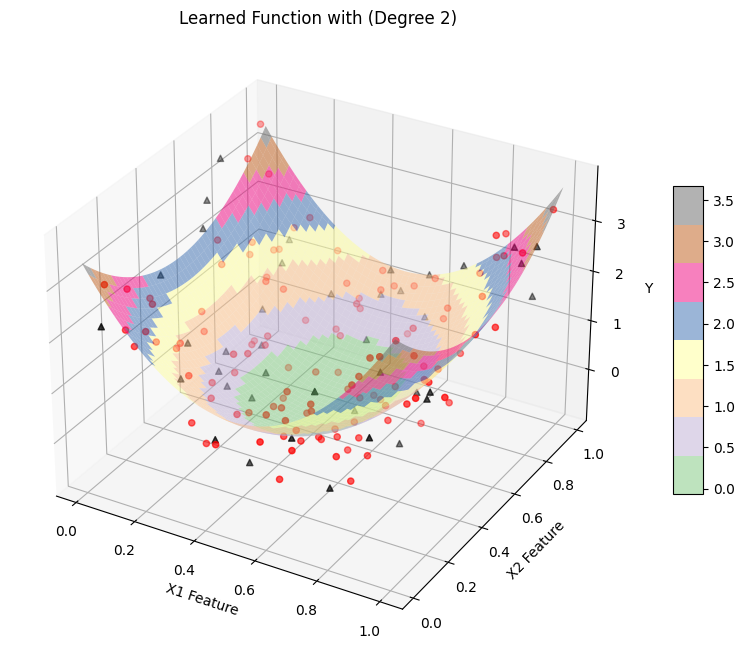

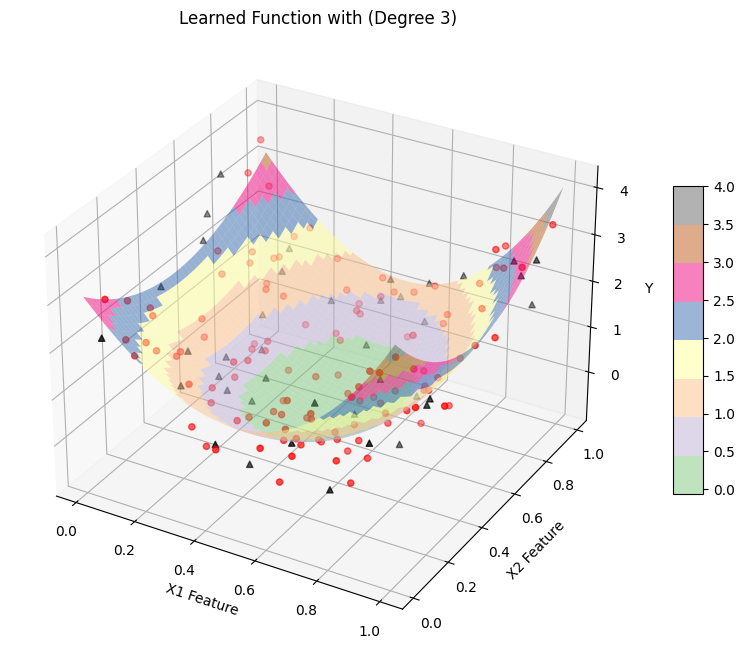

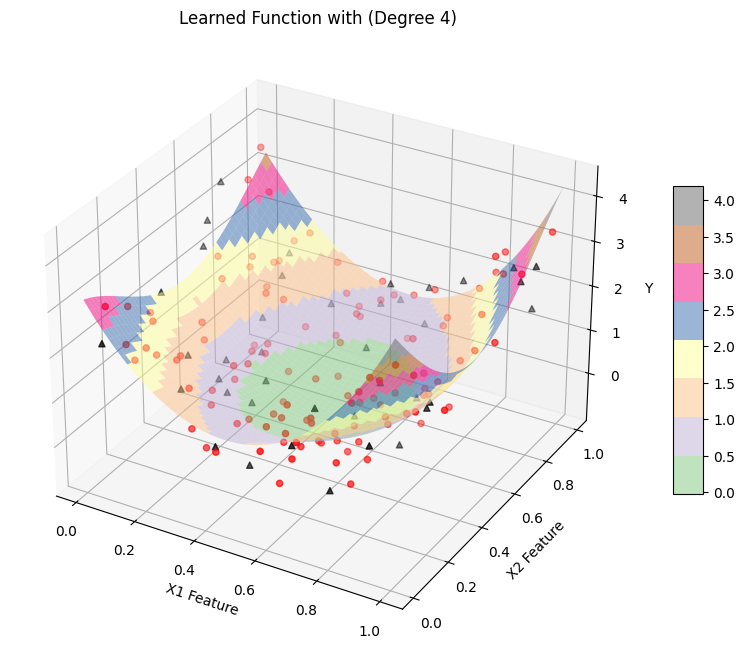

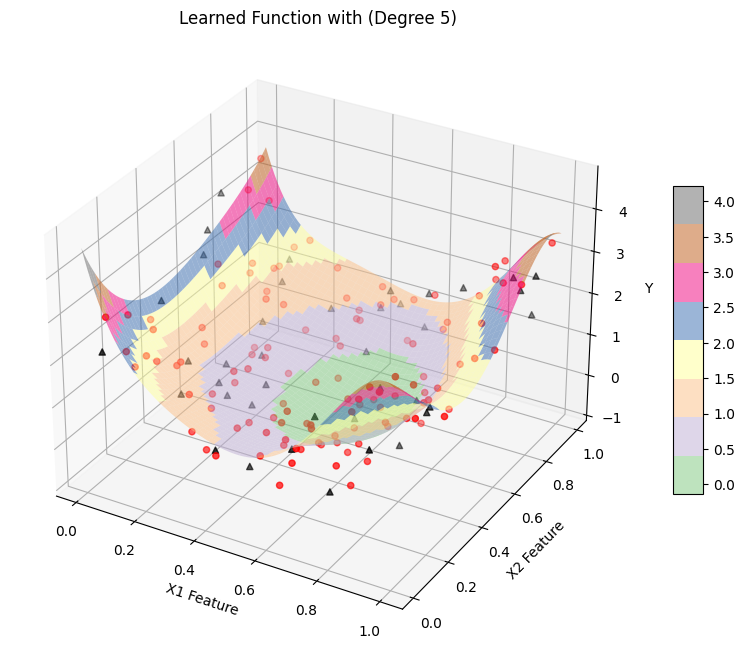

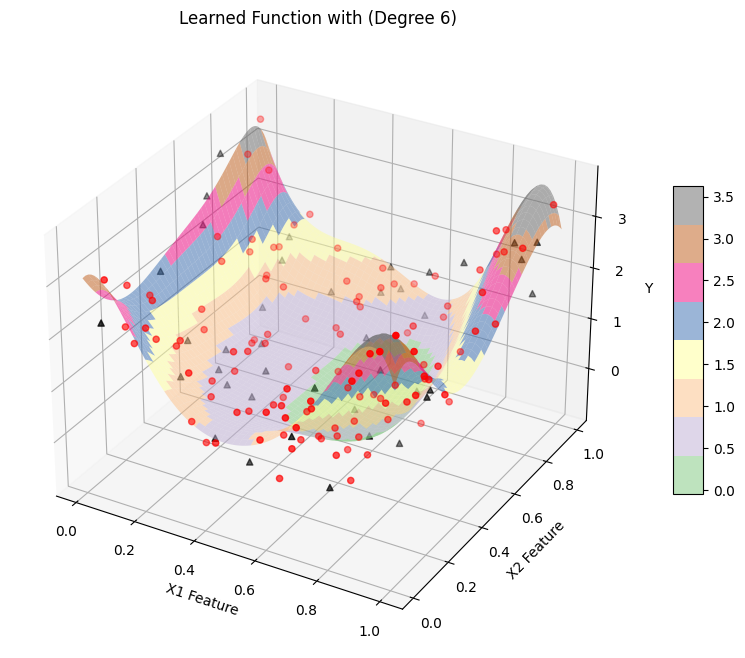

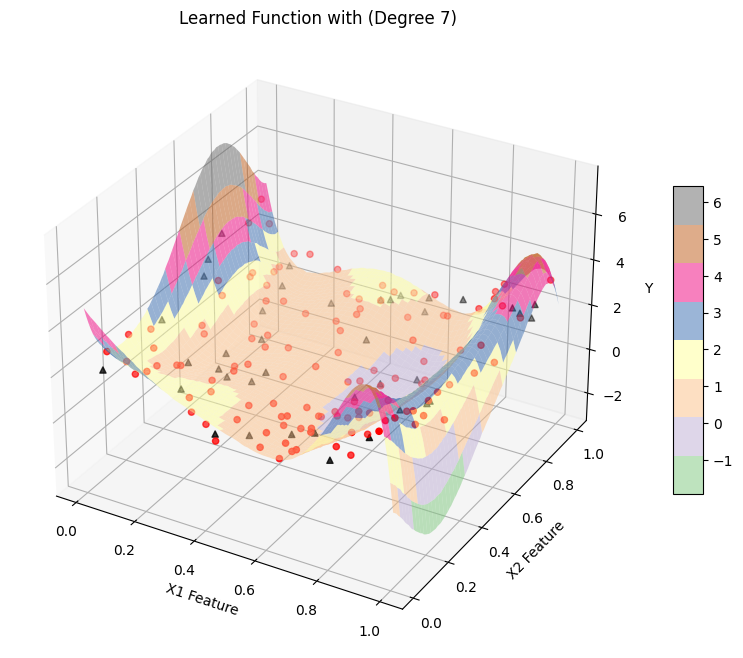

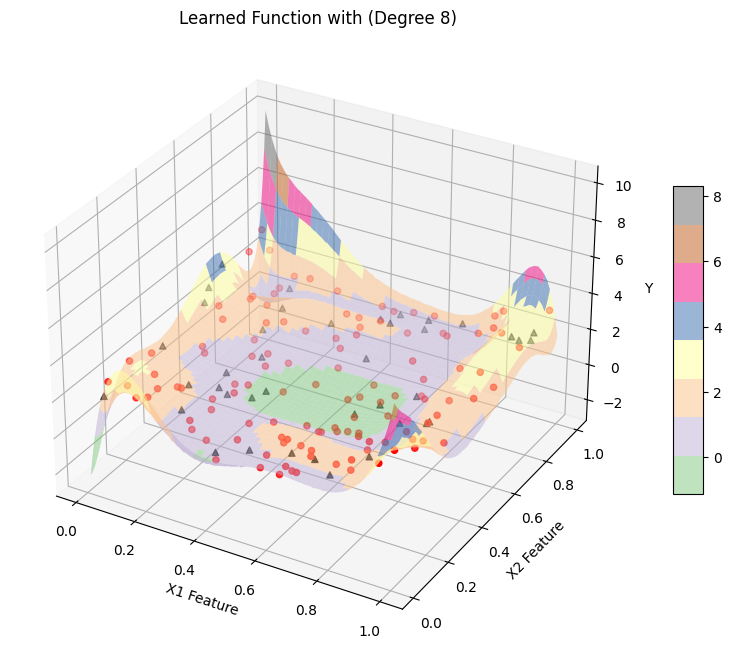

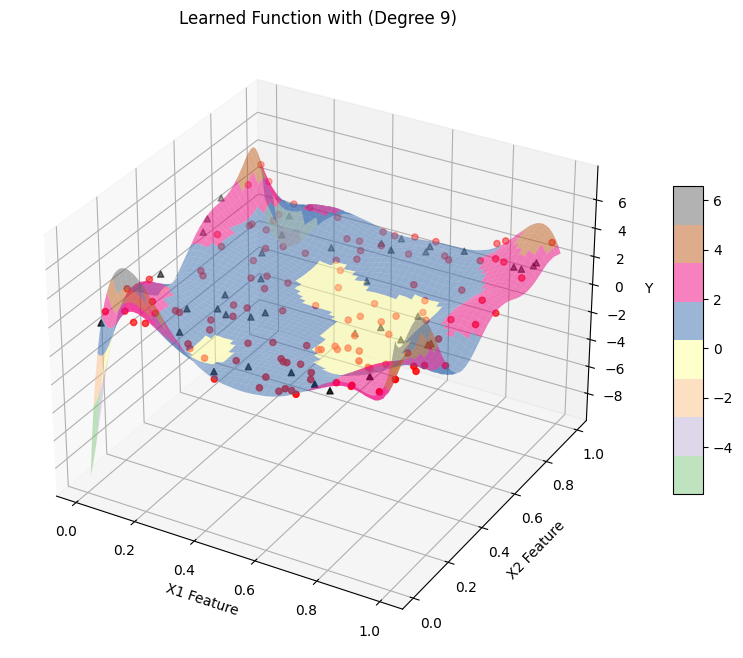

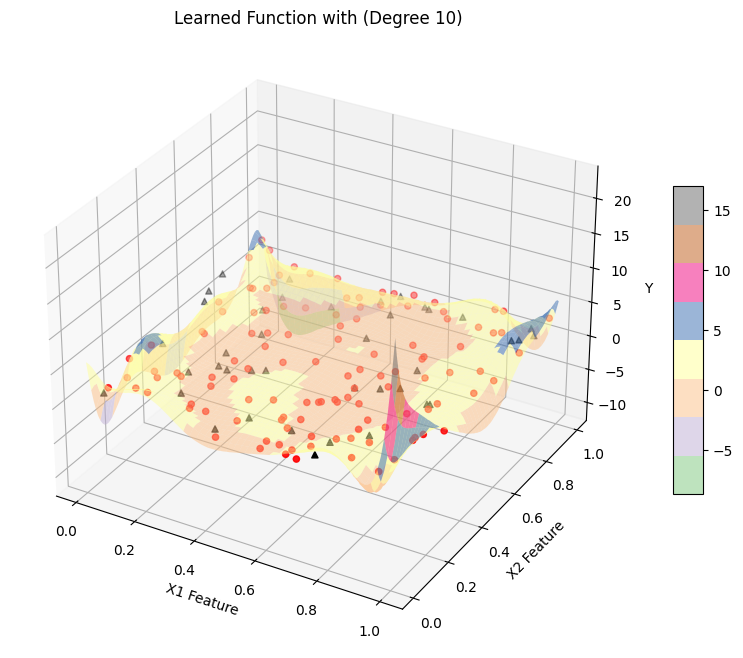

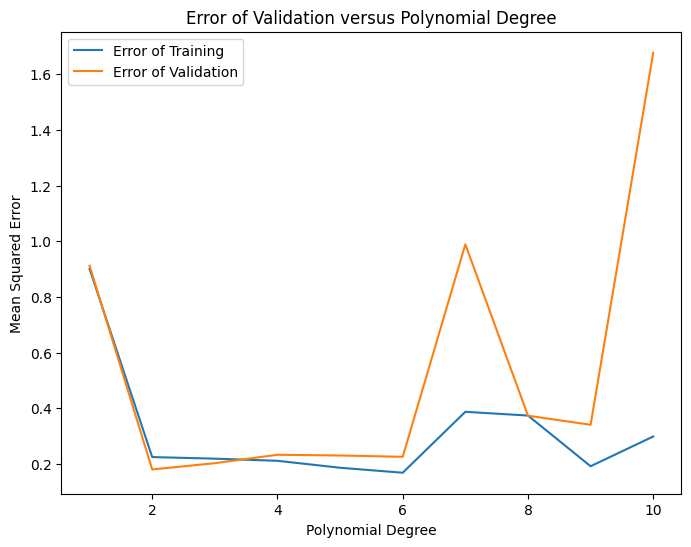

The best polynomial degree is 2.


In [4]:

ArrayForTrainErrors = []
ArrayForValErrors = []
degrees = np.arange(1, 11)

for d in degrees:
    PolynomialFeaturExtracrtion = PolynomialFeatures(degree=d)
    LinearReg_Model = LinearRegression()
    LinearReg_Model.fit(PolynomialFeaturExtracrtion.fit_transform(train_data[['x1', 'x2']].values), train_data['y'])
    ArrayForTrainErrors.append(mean_squared_error(train_data['y'],  LinearReg_Model.predict(PolynomialFeaturExtracrtion.fit_transform(train_data[['x1', 'x2']].values))))
    ArrayForValErrors.append(mean_squared_error(val_data['y'], LinearReg_Model.predict(PolynomialFeaturExtracrtion.transform(val_data[['x1', 'x2']].values))))
    figure = plt.figure(figsize=(12, 8))
    axis = figure.add_subplot(111, projection='3d')
    axis.scatter(train_data['x1'], train_data['x2'], train_data['y'], c='r', marker='o', label='Training Dataset')
    axis.scatter(test_data['x1'], test_data['x2'], test_data['y'], c='black', marker='^', label='Testing Dataset')
    ValuesOfx1, ValuesOfx2 = np.meshgrid(np.linspace(min(CSVdata['x1']), max(CSVdata['x1']), 100), np.linspace(min(CSVdata['x2']), max(CSVdata['x2']), 100))
    ValuesoFy = LinearReg_Model.predict(PolynomialFeaturExtracrtion.transform(np.column_stack((ValuesOfx1.ravel(), ValuesOfx2.ravel()))))
    ValuesoFy = ValuesoFy.reshape(ValuesOfx1.shape)
    figure.colorbar(axis.plot_surface(ValuesOfx1, ValuesOfx2, ValuesoFy, alpha=0.5, cmap='Accent', label='Learned Function'), shrink=0.5, aspect=10)
    axis.set_xlabel('X1 Feature')
    axis.set_ylabel('X2 Feature')
    axis.set_zlabel('Y')
    axis.set_title(f'Learned Function with (Degree {d})')
    plt.show()

plt.figure(figsize=(8, 6))
plt.plot(degrees, ArrayForTrainErrors, label='Error of Training')
plt.plot(degrees, ArrayForValErrors, label='Error of Validation')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Error of Validation versus Polynomial Degree')
plt.legend()
plt.show()

BestValue = degrees[np.argmin(ArrayForValErrors)]
print(f'The best polynomial degree is {BestValue}.')








in the results shown above, after identifing the best degree, the plot of validation error versus polynomial degree make a balance model fit and overfitting, so a rising validation error after a certain degree give an indication about overfitting, while a a consistently high error suggests underfitting

**C.**

in this part, the implementation of Ridge regression with polynomial features of degree 8 was used, and its explore the effect of diffrent regularization parameters on the mean squared error and visualizes the results using a plot. Therefore, it identfies athe best lambada or regularization parameter based on the minimum mean squared error

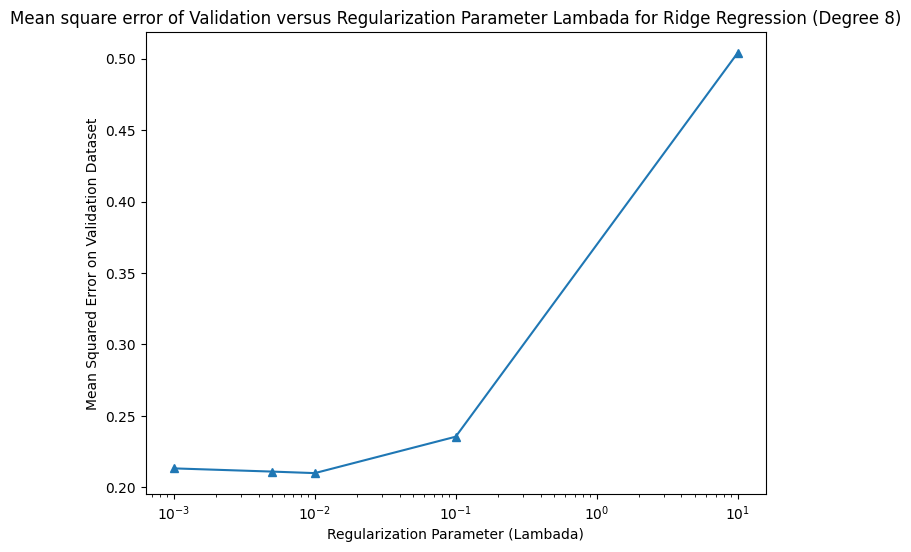

The best lambada value is 0.01.


In [5]:

ValuesOfMeanSquaredError = []
Lambadas = [0.001, 0.005, 0.01, 0.1, 10]
degree = 8
polynomial = PolynomialFeatures(degree=degree)
for L in Lambadas:

    RidgeModel_Reg = Ridge(alpha=L)
    RidgeModel_Reg.fit(polynomial.fit_transform(train_data[['x1', 'x2']].values), train_data['y'])
    MeanSquaredError = mean_squared_error(val_data['y'], RidgeModel_Reg.predict(polynomial.transform(val_data[['x1', 'x2']].values)))
    ValuesOfMeanSquaredError.append(MeanSquaredError)


plt.figure(figsize=(8, 6))
plt.plot(Lambadas, ValuesOfMeanSquaredError, marker='^')
plt.xscale('log')
plt.xlabel('Regularization Parameter (Lambada)')
plt.ylabel('Mean Squared Error on Validation Dataset')
plt.title('Mean square error of Validation versus Regularization Parameter Lambada for Ridge Regression (Degree 8)')
plt.show()

BestLambada=Lambadas[np.argmin(ValuesOfMeanSquaredError)]
print(f'The best lambada value is {BestLambada}.')


as shown in the result above, the plot of mean squared error on the validation set versus the regularization parameter lambada was helped in selecting the optimal level of regularization. Hence, a small regularization parameter may lead to overfitting, while a large one may result in underfitting, so this result aims to find the right balance between fitting the training data and preventing model from becoming too complex

**Part 2**

Firstly, the data is read and stored using pandas, and the data was seprated into X1 feature and X2 feature with y as label for classification, to make the data ready for fits the model with linear decision boundry


In [8]:

train_data = pd.read_csv('train_cls.csv')
test_data = pd.read_csv('test_cls.csv')
TrainFeature1 = np.array(train_data['x1'])
TrainFeature2 = np.array(train_data['x2'])
TestFeature1 = np.array(test_data['x1'])
TestFeature2 = np.array(test_data['x2'])
TrainFeatures = np.c_[TrainFeature1, TrainFeature2]
TestFeatures = np.c_[TestFeature1, TestFeature2]
Labely = {'C1': 1, 'C2': 0}
TrainLabely = np.array(train_data['class'].map(Labely))
TestLabely = np.array(test_data['class'].map(Labely))

Seoondly, the function implemented below 'plot_data' is created to visually represent two datasets training and testing datasets on a pair of axes, so it uses a scatter plots to display points from each dataset  with diffrent colors for diffrent classes , and the legends added to the plots to distnguish between classes and axes labels

In [15]:

def DataPlotting(axis):
    axis[0].scatter(TestFeature1, TestFeature2, c=test_data['class'].map({'C1': 'RED', 'C2': 'BLUE'}), s=10)
    axis[0].legend(title='class', handles=[Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in
               {'C1': 'RED', 'C2': 'BLUE'}.items()], loc='upper right')
    axis[0].set_xlabel('X1 Feature')
    axis[0].set_ylabel('X2 Feature')
    axis[0].set_title('Model Fits Testing Set')


    axis[1].legend(title='class', handles=[Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in
               {'C1': 'RED', 'C2': 'BLUE'}.items()], loc='upper right')
    axis[1].scatter(TrainFeature1, TrainFeature2, c=train_data['class'].map({'C1': 'RED', 'C2': 'BLUE'}), s=10)
    axis[1].set_xlabel('X1 Feature')
    axis[1].set_ylabel('X2 Feature')
    axis[1].set_title('Model Fits Training Set')







Thirdly, the function implemented below provides a convenient way to visualize the decision boundry of the trained model, along with the training and testing data points. Hence, the decision boundry is displayed using contout plots, and accuarcy are shown on the plot, and the function 'DataPlotting()' implemented above used fot handle the plotting datasets

In [16]:

def DecisionBoundryPlotting(title, model, order=1, cmap='RdBu_r'):
    StepSize = 0.06
    MinFeature, MaxFeature = min(TrainFeature1.min(), TestFeature1.min()) - StepSize, max(TrainFeature1.max(), TestFeature1.max()) + StepSize

    MinLabely, MaxLabely = min(TrainFeature2.min(), TestFeature2.min()) - StepSize, max(TrainFeature2.max(), TestFeature2.max()) +  StepSize

    Xgrid, Ygrid = np.meshgrid(np.arange(MinFeature, MaxFeature, 0.003),
                         np.arange(MinLabely, MaxLabely, 0.003))

    FullGrid = np.c_[Xgrid.ravel(), Ygrid.ravel()]

    ModelFitting = model.predict(FullGrid ** order)

    ModelFitting = ModelFitting.reshape(Xgrid.shape)

    AccuracyOfTrainData= model.score(TrainFeatures ** order, TrainLabely)

    AccuracyOfTestData= model.score(TestFeatures ** order, TestLabely)

    Accuracy = [AccuracyOfTrainData,AccuracyOfTestData]

    plot, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    figure.suptitle(title)

    axis[0].contourf(Xgrid, Ygrid, ModelFitting, cmap=cmap, alpha=0.25)
    axis[0].contour(Xgrid, Ygrid, ModelFitting, colors='k', linewidths=0.7)
    axis[0].text(-1, -1.3, f'Accuracy = {Accuracy[0]:.7f}', fontsize=10)

    axis[1].contourf(Xgrid, Ygrid, ModelFitting, cmap=cmap, alpha=0.25)
    axis[1].contour(Xgrid, Ygrid, ModelFitting, colors='k', linewidths=0.7)
    axis[1].text(-1, -1.3, f'Accuracy value for model = {Accuracy[1]:.7f}', fontsize=10)


    DataPlotting(axis)

**A.**

Here, logisitc regression model without regurlarization on a training dataset. After training, it visualizes the decision boundry of the logisitc regression model using the function implemented above, so the resulting plot shows the decision boundry, with contour line and the accuracy value for the logisitc regression model on both the training and testing dataset

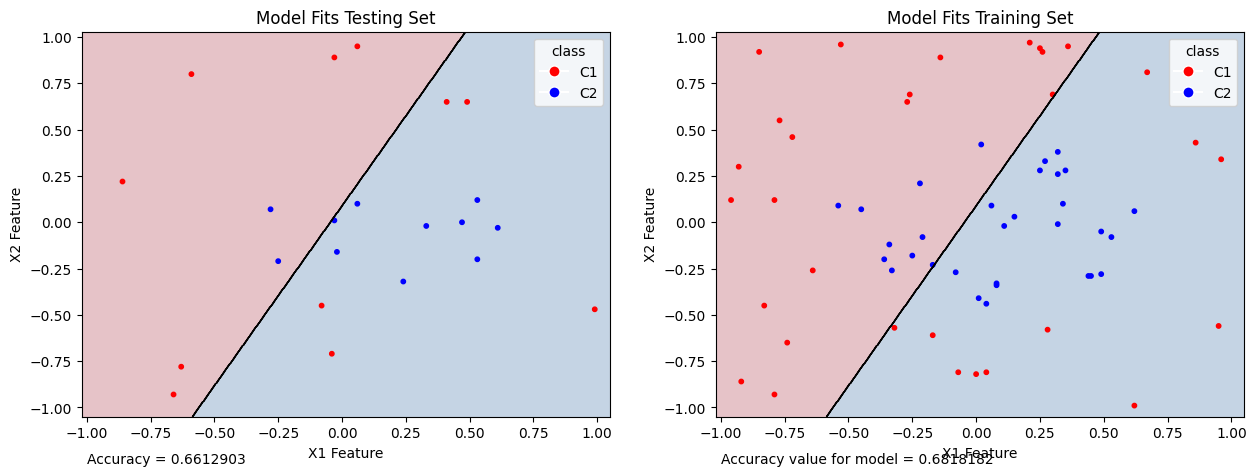

In [17]:
LogisitcRegressionModel = LogisticRegression()
LogisitcRegressionModel.fit(TrainFeatures, TrainLabely.ravel())

DecisionBoundryPlotting('Logisitc Regression Linear Model', LogisitcRegressionModel)

**B.**

Finally, a non-linear logisitc regression model by applying a quadratic transformation to the input features x1 and x2 before training, so the resulting decision boundry will be non-linear due to the quadratic terms in the model, and the function implemted above to plot the decision boundry used to visualize the decision boundry with contour lines and accuracy for the logisitc regrssion model on both the training and testing datasets

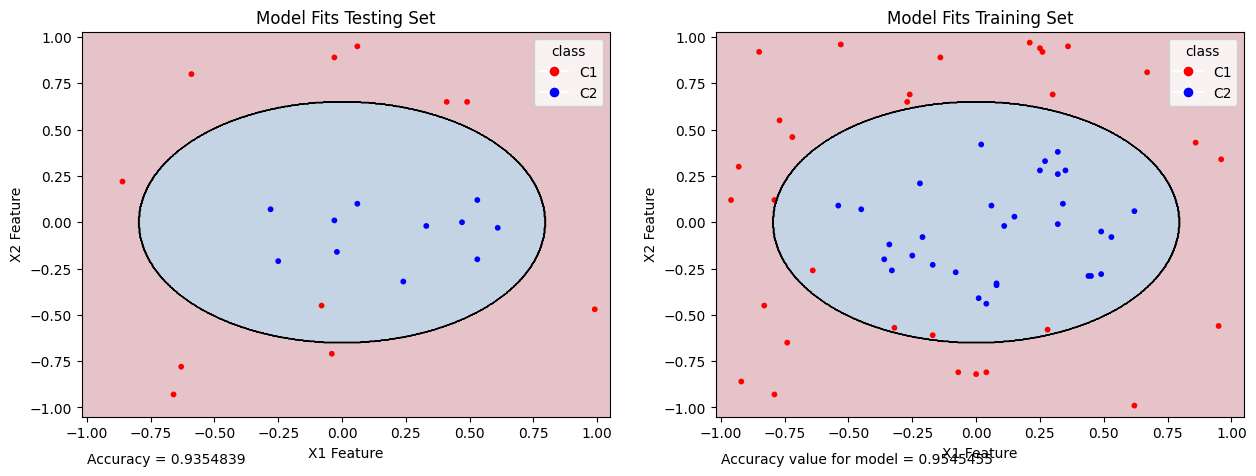

In [18]:
LogisitcRegressionModel.fit(TrainFeatures ** 2, TrainLabely.ravel())

DecisionBoundryPlotting('Logistic Regression Non-Linear with quadratic degree Model', LogisitcRegressionModel, order=2)

# Coclusion and discussion about the two models

as shown in th results of the models above, it can be obvious that the lineal model underfits the data as it accuracy value of the training and testing was low (0,66 and 0.68). Also, the quadratic with second order model fits the data in good way ob both training and testing datasets, with an accuracy value of (0.95 and 0.93), so here no overfitting or underfitting.

In response to the results that shown above, if the linear model too simple, it may underfit the data, so the underfitting implies that the model fails to capture the underlying patterns in the data, resulting in low accuracy in both testing and training datasets, and vice versa, if the model is complex, it may overfit the data, and the overfitting occurs when the model fits the training data too closely, and caputring noise rather than true patterns leading to high training accuracy but poor generalization to the testing dataset.


In other hand, the quadratic model is more flexible, allowing for a more complex decision boundry, so this complexity might lead to better fitting of the training datasets with improved training accuracy. However, it possible to be overfitted with the quadratic model, if the model was too complex, it might fit the training dataset too closely, resulting in high accuracy with training dataset, but poor testing accuracy.


